In [1]:
OUTPUT_DIR = './hoge/'

In [2]:
%matplotlib inline

In [3]:
import sys 
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import cv2

from blurnet.utils import dataloader, GaussianBlurAll

In [27]:
def imshow(img, title='',filename='', scale=True):
    img = img / 2 + 0.5     # unnormalize
    if type(img) == torch.Tensor:
        img = img.numpy()
        plt.imshow(np.transpose(img, (1, 2, 0)))
        # plt.imshow(img)
    else:  # if type(img) == numpy.ndarray
        plt.imshow(img)
    if not scale:
        plt.xticks([])  # if you want to remove scale axes
        plt.yticks([])
    if title:
        plt.title(title)
    if filename:
        plt.savefig(filename)  # added for saving the image
    plt.show()

In [15]:
trainloader, testloader, classes = dataloader(16)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

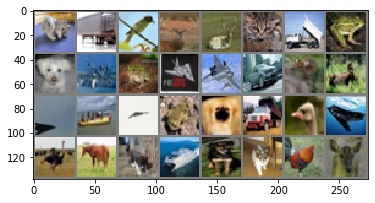

In [7]:
# show images
imshow(torchvision.utils.make_grid(images))

In [53]:
images.size()

torch.Size([32, 3, 32, 32])

In [113]:
img = images[14]

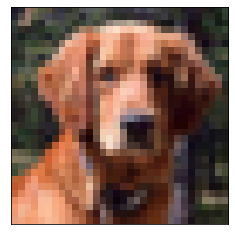

In [114]:
imshow(img,title='', filename= OUTPUT_DIR + 'raw_only.png', scale=False)

---
# cv2.GaussianBlur
dalaloaderによって複数の画像が出力される。(32,32)で小さい。  
しかし、cv2.GaussianBlurは一枚ずつ（のはず）。

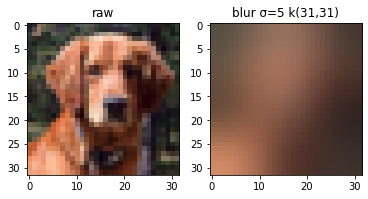

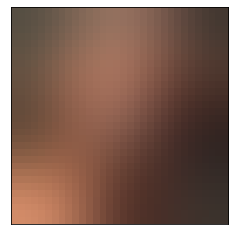

In [130]:
sigma= 5
radius = sigma * 3 * 2+1
kernel_size=(radius, radius)
img = images[14]
img = img / 2 + 0.5 
npimg = img.numpy()
blur_file =  OUTPUT_DIR + 'blur_s{0}_k{1}-{1}_only.png'.format(sigma, kernel_size[0])
comp_file =  OUTPUT_DIR + 'blur_s{0}_k{1}-{1}_comparison.png'.format(sigma, kernel_size[0])
blur = cv2.GaussianBlur(npimg.transpose(1, 2, 0), kernel_size, sigma)
# cv2.imwrite('./blur_s3_k9-9.png', blur)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(npimg.transpose(1, 2, 0))
axes[0].set_title('raw')
axes[1].imshow(blur)
axes[1].set_title('blur σ={0} k({1},{1})'.format(sigma, kernel_size[0]))
# axes[1].set_title('blur k({0},{0})'.format(kernel_size[0]))
# axes[1].set_title('blur σ={0}'.format(sigma))
plt.savefig(comp_file)
plt.show(fig)
# show and save an image
#plt.figure(figsize=(32,32))
# plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
fig, axes = plt.subplots(1, 1)
plt.xticks([])
plt.yticks([])
# axes.set_title('blur σ={0} k({1},{1})'.format(sigma, kernel_size[0]))
plt.imshow(blur)
plt.savefig(blur_file)  # added for saving the image
plt.show()

In [78]:
np.square(npimg.transpose(1, 2, 0) - blur).sum()

20.799965

In [79]:
np.allclose(npimg.transpose(1, 2, 0), blur)

False

plt.xticks([])
plt.yticks([])
plt.imshow(npimg.transpose(1, 2, 0))
plt.savefig('hoge.png')  # added for saving the image
plt.show()

# 関数作成
`GaussianBlurAll`は複数の画像をぼかす。

In [39]:
def GaussianBlurAll(imgs, kernel_size, sigma):
    imgs = imgs.numpy()
    imgs_list = []
    for img in imgs:
         imgs_list.append(cv2.GaussianBlur(img.transpose(1, 2, 0), kernel_size, sigma))
    imgs_list = np.array(imgs_list)
    imgs_list = imgs_list.transpose(0, 3, 1, 2)
    return  torch.from_numpy(blurred_imgs)  

In [36]:
images, labels = dataiter.next()

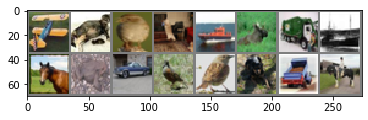

In [37]:
imshow(torchvision.utils.make_grid(images))

In [40]:
b_imgs = GaussianBlurAll(images, sigma)

In [41]:
b_imgs.size()

torch.Size([16, 3, 32, 32])

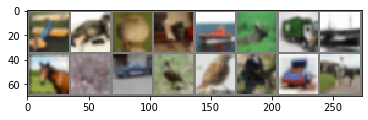

In [42]:
imshow(torchvision.utils.make_grid(b_imgs))

In [30]:
torchvision.utils.make_grid(b_imgs).size()

torch.Size([3, 70, 274])

# torch tensorをそのままぼかす
無理だった

## kernel_size = (1, 1) だとぼかしは効かない

In [21]:
kernel_size = (1, 1)
sigma = 100

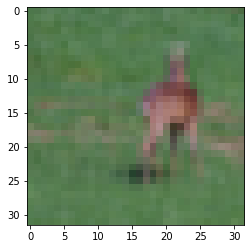

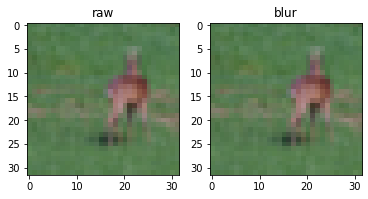

In [22]:
img = images[0]
npimg = img.numpy()
# blurfile = 'blur_s1_k3-3.png'
blur = cv2.GaussianBlur(npimg.transpose(1, 2, 0), kernel_size, sigma)
# cv2.imwrite( OUTPUT_DIR + 'blur_s3_k9-9.png', blur)
imshow(blur)

npimg = npimg / 2 + 0.5 
blur = blur / 2 + 0.5 
fig, axes = plt.subplots(1, 2)
axes[0].imshow(npimg.transpose(1, 2, 0))
axes[0].set_title('raw')
axes[1].imshow(blur)
axes[1].set_title('blur')
# plt.savefig( OUTPUT_DIR + 'compare.png')
plt.show(fig)


In [23]:
np.square(npimg.transpose(1, 2, 0) - blur).sum()

0.0

In [24]:
np.allclose(npimg.transpose(1, 2, 0), blur)

True